In [1]:
%load_ext watermark

In [3]:
%watermark -v

CPython 3.6.3
IPython 6.4.0


In [5]:
%watermark -p numpy,scipy,sklearn,pandas,matplotlib

numpy 1.14.5
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.1
matplotlib 2.2.2


In [6]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

PROJECT_ROOT_DIR='.'
CHAPTER_ID = 'classification'

def save_fig(fig_id, tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [7]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [9]:
X,y = mnist['data'], mnist['target']

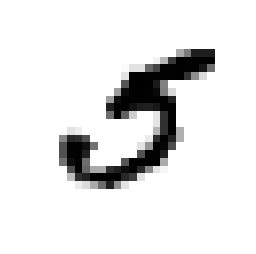

In [11]:
%matplotlib inline

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()


In [12]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.binary,
              interpolation='nearest')
    plt.axis('off')

In [30]:
def plot_digits(instances, images_per_row=10, **options):
    size=28
    images_per_row=min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1)//images_per_row + 1
    row_images=[]
    n_empty = n_rows*images_per_row - len(instances)
    #images.append(np.zeros((size, size*n_empty)))
    images.append(np.zeros((n_empty, size, size)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")
 

In [31]:
np.zeros((10, 2,2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

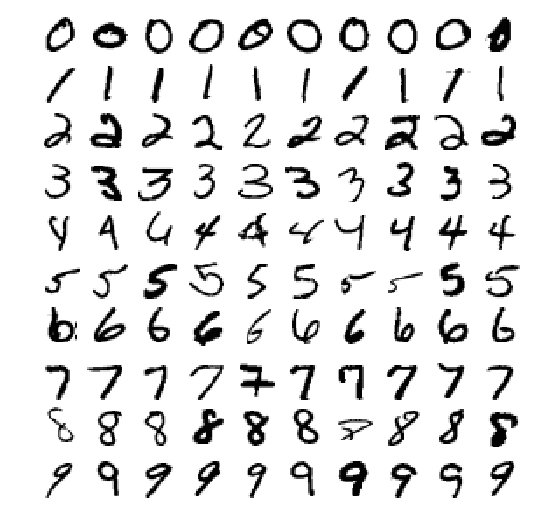

In [33]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [116]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [131]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [132]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [133]:
print(y_train_5)

[False False False ... False False False]


In [134]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [135]:
sgd_clf.predict([some_digit])

array([ True])

In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9502 , 0.96565, 0.96495])

In [137]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


In [138]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [139]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

In [140]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [141]:
sum(y_train_pred==y_train_5)/len(y_train_pred)

0.9602666666666667

In [142]:
cross_val_score(sgd_clf, X_train, y_train_5,scoring='accuracy')

array([0.9502 , 0.96565, 0.96495])

In [143]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [144]:
y_train_perfect_predictions = y_train_5

In [145]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [146]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [147]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [148]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [149]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [150]:
threshold=200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [155]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [156]:
y_scores.shape

(60000,)

In [157]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [158]:
print(precisions)
print(recalls)
print(thresholds)

[0.09080706 0.09079183 0.09079335 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-1613405.71147769 -1612415.64410228 -1611701.37464018 ...
   954170.04762499   987947.69103863  1002862.09359785]


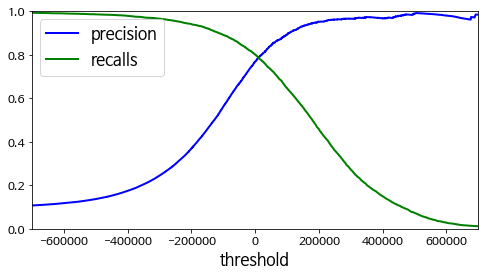

In [163]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b-', label='precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label='recalls', linewidth=2)
    plt.xlabel('threshold', fontsize=16)
    plt.legend(loc='upper left', fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

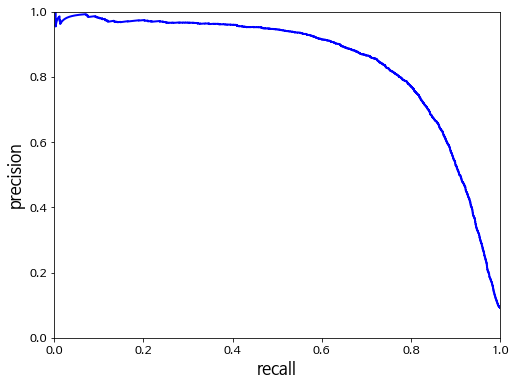

In [164]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('recall', fontsize=16)
    plt.ylabel('precision', fontsize=16)
    plt.axis([0,1,0,1])
    
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [165]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

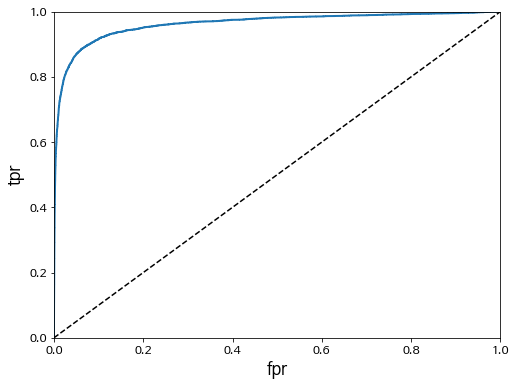

In [166]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('fpr', fontsize=16)
    plt.ylabel('tpr', fontsize=16)
    
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.show()

In [167]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967155

In [168]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [169]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest , tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

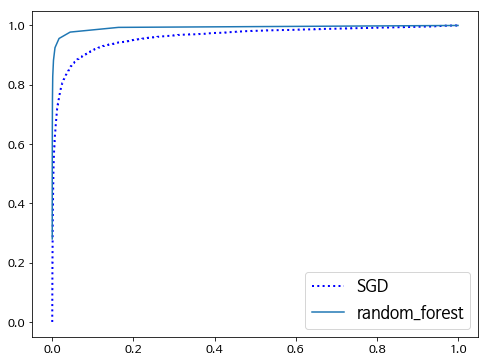

In [172]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:", linewidth=2, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='random_forest')
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [173]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [174]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [175]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

In [176]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [179]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [180]:
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [181]:
np.argmax(some_digit_scores)

5

In [182]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [183]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [185]:
len(ovo_clf.estimators_)

45

In [186]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [187]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [192]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.84063187, 0.84899245, 0.86652998])

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91011798, 0.90874544, 0.906636  ])

In [190]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [191]:
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

In [194]:
def plot_confusion_matrix(matrix):
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

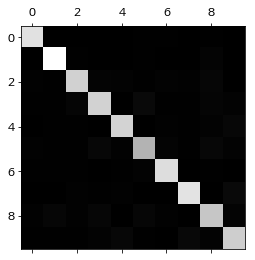

In [197]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [199]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
print(row_sums)
norm_conf_mx = conf_mx/row_sums
print(norm_conf_mx)

[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]
[[9.66570994e-01 5.06500084e-04 4.05200068e-03 1.51950025e-03
  1.68833361e-03 8.27283471e-03 8.44166807e-03 1.68833361e-03
  6.58450110e-03 6.75333446e-04]
 [2.96647879e-04 9.63067339e-01 6.37792940e-03 3.70809849e-03
  1.03826758e-03 5.93295758e-03 7.41619697e-04 1.48323939e-03
  1.61673094e-02 1.18659152e-03]
 [8.55991944e-03 6.88150386e-03 8.93084928e-01 1.74555220e-02
  1.49378986e-02 4.36388050e-03 1.46022155e-02 1.00704935e-02
  2.78616986e-02 2.18194025e-03]
 [7.66595988e-03 7.50285435e-03 2.29978796e-02 8.71309737e-01
  1.63105529e-04 3.76773773e-02 6.52422117e-03 8.15527646e-03
  2.29978796e-02 1.50057087e-02]
 [3.25231085e-03 4.96405341e-03 7.01814447e-03 1.71174255e-03
  9.18521054e-01 1.54056830e-03 9.58575830e-03 6.33344745e-03
  1.47209860e-02 3.23519343e-02]
 [1.34661502e-02 8.30105147e-03 6.64084117e-03 3.56022874e-02
  1.18059399e-02 8.45231507e-01 2.04759270e-02 5.53403431e-03
  3.560228

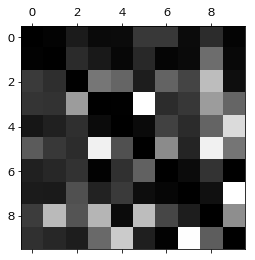

In [201]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

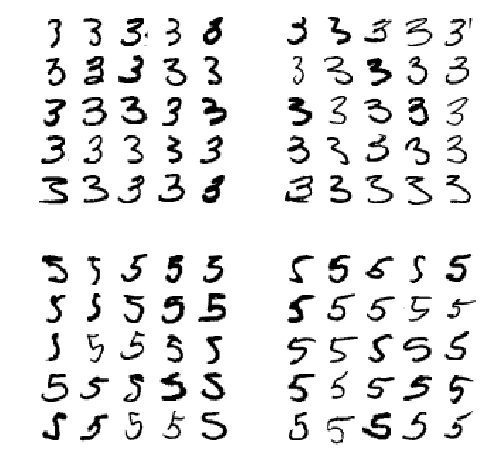

In [202]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) # 실제 3, 예측 3
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) # 실제 3, 예측 5
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) # 실제 5, 예측 3
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) # 실제 5, 예측 5

plt.show()

In [203]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [204]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [ True,  True]])

In [205]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [208]:
noise = np.random.randint(0, 100, (len(X_train), 784))
#print(noise)
X_train_mod = X_train + noise
#print(X_train[1])
#print(X_train_mod[1])

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

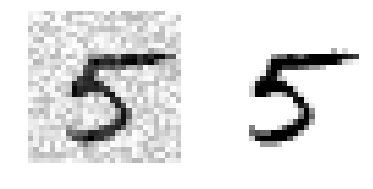

In [209]:
some_index = 5500
plt.subplot(121)
plot_digit(X_test_mod[some_index])
plt.subplot(122)
plot_digit(y_test_mod[some_index])
plt.show()

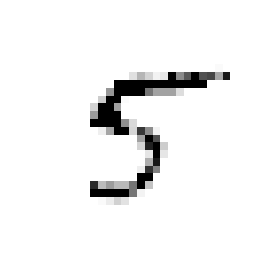

In [210]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [211]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method = 'predict_proba')
y_scores_dmy = y_probas_dmy[:, 1]

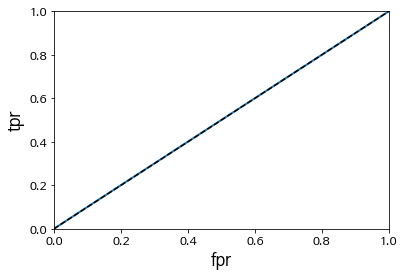

In [213]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_knn_pred)